In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading csv file
data = pd.read_csv("C:/Users/ch likitha/Desktop/mldm/Categorical.csv")
data.dtypes

name          object
Longitude    float64
Latitude     float64
continent     object
dtype: object

In [3]:
data_new = data.iloc[:, [1, 2]].values
data_new

array([[ -69.98267711,   12.52088038],
       [  66.00473366,   33.83523073],
       [  17.53736768,  -12.29336054],
       [ -63.06498927,   18.2239595 ],
       [  20.04983396,   41.14244989],
       [  19.95328768,   60.21488688],
       [   1.56054378,   42.54229102],
       [  54.3001671 ,   23.90528188],
       [ -65.17980692,  -35.3813488 ],
       [  44.92993276,   40.28952569],
       [-170.7180258 ,  -14.30445997],
       [  19.92108951,  -80.50857913],
       [ 123.5838379 ,  -12.42993164],
       [  69.22666758,  -49.24895485],
       [ -61.79469343,   17.2774996 ],
       [ 134.4910001 ,  -25.73288704],
       [  14.1264761 ,   47.58549439],
       [  47.54599879,   40.28827235],
       [  29.87512156,   -3.35939666],
       [   4.64065114,   50.63981576],
       [   2.32785254,    9.6417597 ],
       [  -1.75456601,   12.26953846],
       [  90.23812743,   23.86731158],
       [  25.21552909,   42.76890318],
       [  50.54196932,   26.04205135],
       [ -98.30777028,   

In [12]:
nrows=data_new.shape[0]
ncols=data_new.shape[1]
niter=1000
K=4 #number of clusters

In [14]:
#centroid calculation
Centroids=np.array([]).reshape(ncols,0) 
for i in range(K):
    rand=np.random.randint(0,nrows-1)
    Centroids=np.c_[Centroids,data_new[rand]]

In [21]:
for i in range(niter):
    #euclidean distance
    Euclidian_Distance=np.array([]).reshape(nrows,0)

    for k in range(K):
        temp=np.sum((data_new-Centroids[:,k])**2,axis=1)
        Euclidian_Distance=np.c_[Euclidian_Distance,temp]
    x=np.argmin(Euclidian_Distance,axis=1)+1
    
     
    output_dict={}
    temp_dict={}
    for k in range(K):
        temp_dict[k+1]=np.array([]).reshape(ncols,0)
    for i in range(nrows):
        temp_dict[x[i]]=np.c_[temp_dict[x[i]],data_new[i]]
     
    for k in range(K):
        temp_dict[k+1]=temp_dict[k+1].T
    
    for k in range(K):
         Centroids[:,k]=np.mean(temp_dict[k+1],axis=0)
    output_dict=temp_dict


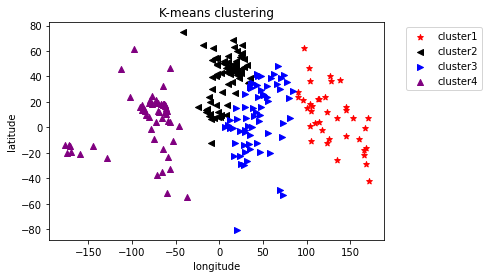

In [30]:
color=['red','black','blue','purple']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(K):
    markers=['*','<','>','^']
    plt.scatter(output_dict[k+1][:,0],output_dict[k+1][:,1],c=color[k],label=labels[k],marker=markers[k])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('K-means clustering')
plt.show()
